In [78]:
import numpy as np
import pandas as pd

def simulate(lambda_A, lambda_B, K):
    # Simulate K matches between teams A and B
    results = []
    for i in range(K):
        # Simulate the number of goals for each team using Poisson distributions
        goals_1 = np.random.poisson(lambda_A)
        goals_2 = np.random.poisson(lambda_B)

        goal_spread = goals_1 - goals_2

        # Determine the winner of the match
        if goal_spread > 0:
            winner = '1'
        elif goal_spread < 0:
            winner = '2'
        else:
            winner = 'X'

        # Store the results in a dictionary
        result = {'Match': i+1, 'Team 1 Goals': goals_1, 'Team 1 Goals': goals_2, 'Goal Spread': goal_spread, 'Winner': winner}
        results.append(result)

    # Create a Pandas DataFrame from the results
    df = pd.DataFrame(results)

    return df


In [79]:

# Define the Poisson rate parameters for each team
lambda_A = 1.5
lambda_B = 1.2

# Define the number of simulations
K = 100000

df = simulate(lambda_A, lambda_B, K)

In [80]:
df.head()

,Match,Team 1 Goals,Goal Spread,Winner
0,1,0,2,1
1,2,3,-1,2
2,3,1,-1,2
3,4,2,-1,2
4,5,0,2,1


<Axes: >

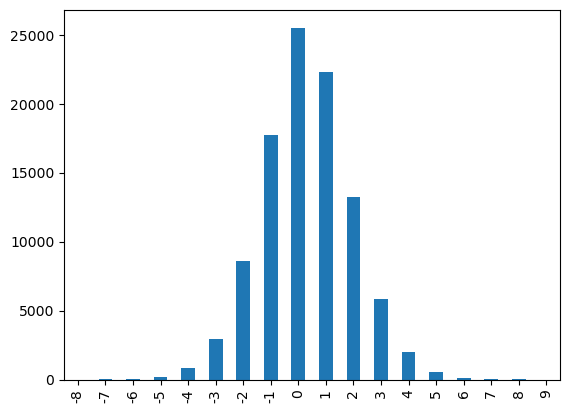

In [81]:
df["Goal Spread"].value_counts().sort_index().plot(kind="bar")

In [82]:
(df.groupby("Winner").size() / K)

Winner
1    0.44094
2    0.30353
X    0.25553
dtype: float64

In [83]:
import requests
from bs4 import BeautifulSoup

# Define the URL to scrape
url = 'https://www.bet365.bet.ar/?_h=3LwNG5H5dnUh2GAZlKipZQ%3D%3D#/AC/B1/C1/D1002/E84855132/G40/'

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find all the <p> tags on the page and extract their text content
p_tags = soup.find_all('p')
p_texts = [p.get_text() for p in p_tags]

# Print the extracted text content
print(p_texts)

['You do not have access to www.bet365.bet.ar.', 'The site owner may have set restrictions that prevent you from accessing the site.', 'Error details', 'Provide the site owner this information.', 'I got an error when visiting www.bet365.bet.ar/?_h=3LwNG5H5dnUh2GAZlKipZQ%3D%3D.', 'Error code: 1020', 'Ray ID: 7c7600848cbaab25', 'Country: AR', 'Data center: eze03', 'IP: 186.18.0.116', 'Timestamp: 2023-05-14 20:48:26 UTC', 'Click to copy', '\n               Performance & security by Cloudflare \n']


A Manopla!

![Alt text](boca-belgrano.png)

In [99]:
# From Boca's perspective
house_odds = pd.Series([1.75, 3.3, 5.75], ["1", "X", "2"])
house_odds

1    1.75
X    3.30
2    5.75
dtype: float64

In [100]:
import requests
from bs4 import BeautifulSoup

# Define the URL to scrape
url = 'https://www.promiedos.com.ar/primera'

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [101]:
historico = soup.find("table")

In [102]:
import pandas as pd

# Assuming you have a Beautifulsoup object called "soup" and a table element called "table"
# You can extract the table rows and columns using the find_all method
rows = historico.find_all('tr')
columns = [v.text.replace('\n', '') for v in rows[0].find_all('th')]

# Create a pandas dataframe with the extracted rows and columns
df = pd.DataFrame(columns=columns)

for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    values = [td.text.replace('\n', '') for td in tds]
    df = df.append(pd.Series(values, index=columns), ignore_index=True)

# Now you have a pandas dataframe with the table data

/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_23855/2239294595.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(values, index=columns), ignore_index=True)
/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_23855/2239294595.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(values, index=columns), ignore_index=True)
/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_23855/2239294595.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(values, index=columns), ignore_index=True)
/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_23855/2239294595.py:14: FutureWarning: The frame.append method is deprecated and wi

In [103]:
df = df.set_index("Equipo").astype(int)

In [104]:
df["GPP"] = df["GF"] / df["PJ"]

In [114]:
teams = home, away = ["Boca Juniors", "Belgrano"]

In [115]:
df.loc[teams]

,#,Pts,PJ,PG,PE,PP,GF,GC,DIF,GPP
Equipo,,,,,,,,,,
Boca Juniors,16,18,15,5,3,7,18,16,2,1.200000
Belgrano,6,27,15,8,3,4,14,11,3,0.933333


In [123]:
sim = simulate(*df.loc[teams, "GPP"], K)
p_hat = sim.groupby("Winner").size() / K

In [124]:
neutral_odds = 1 / p_hat
odds_df = pd.DataFrame.from_records([house_odds, neutral_odds], index=["House", "Neutral"])

In [125]:
odds_df.round(2)

,1,X,2
House,1.75,3.30,5.75
Neutral,2.38,3.38,3.52


In [129]:
(1 / house_odds).sum()

1.0483719179371351

In [140]:
np.sum(1 / house_odds)

1.0483719179371351

Aja! Casa mala. Asumamos que las verdaderas probabilidades de que pasen son proporcionales a las de la casa.

In [141]:
house_probs = 1 / house_odds
real_probs = house_probs / house_probs.sum()

In [142]:
p_hat, real_probs

(Winner
 1    0.42000
 2    0.28378
 X    0.29622
 dtype: float64,
 1    0.545063
 X    0.289048
 2    0.165889
 dtype: float64)

In [146]:
ev = p_hat * (house_odds - 1) + (1 - p_hat) * -1
ev

1   -0.265000
2    0.631735
X   -0.022474
dtype: float64

### Conclusion
La unica apuesta de +EV es Belgrano. Cuánto apostar, es otro cantar.

### TODO
- Aprender $lambda_x$ directamente de resultados previos. GLM con respuesta Poisson, y ajustar usando resultados de partidos pasados.
- Aprender resultado del partido como una respuesta bivariada directamente. Considerar dummies para eleccion de arbitros, o pares (arbitro, equipo) para capturar "efecto Boca".
- Bet sizing. Algo con Kelly.